## STEP 1: COLLECT DATA

Load libraries

In [1]:
import numpy as np
import pandas as pd
pd.options.display.float_format = "{:.2f}".format
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', context='talk')
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, f1_score
#from causalinference import CausalModel


Load data

In [4]:
df = pd.read_csv(r'data\Spark_vyborka_kompaniy_20230318_1520_1 (1).csv')
df['Conflict'] = df['Conflict']==1
df['Size_company']=df['Size_company']==0
df['T']=df['T']==0
df

,№,Name,Reg_number,Name_Full,Company_year,Size_company,Conflict,T,Capital,Clr,Returns,Ndter,Rddta,Total_debt
0,1,"( КОЛХОЗ ) ИМ. КИРОВА ., СПК",1030000000000.00,СЕЛЬСКОХОЗЯЙСТВЕННЫЙ ПРОИЗВОДСТВЕННЫЙ КООПЕРАТ...,25.00,True,False,False,74299000,7.50,0.12,0.01,NaN,10985000.00
1,1,"( КОЛХОЗ ) ИМ. КИРОВА ., СПК",1030000000000.00,СЕЛЬСКОХОЗЯЙСТВЕННЫЙ ПРОИЗВОДСТВЕННЫЙ КООПЕРАТ...,25.00,True,False,True,68168000,6.67,0.05,0.05,NaN,13156000.00
2,2,"(АО), КРОО",1120000000000.00,"АКЦИОНЕРНОЕ ОБЩЕСТВО ""КОРПОРАЦИЯ РАЗВИТИЯ ОРЕН...",12.00,True,False,False,439447000,1.00,-30.32,-0.07,0.02,66112000.00
3,2,"(АО), КРОО",1120000000000.00,"АКЦИОНЕРНОЕ ОБЩЕСТВО ""КОРПОРАЦИЯ РАЗВИТИЯ ОРЕН...",12.00,True,False,True,486726000,1.60,-1.91,-0.00,0.16,160965000.00
4,6,"(КОЛХОЗ) ИМ. ЛЕНИНА, СПК",1030000000000.00,СЕЛЬСКОХОЗЯЙСТВЕННЫЙ ПРОИЗВОДСТВЕННЫЙ КООПЕРАТ...,23.50,True,False,True,61342000,3.87,0.00,0.12,0.03,10023000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2837,2498,"АГК, ООО",1140000000000.00,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""АЗНА...",8.50,True,False,False,9496000,1.09,0.20,-0.22,0.42,16128000.00
2838,2498,"АГК, ООО",1140000000000.00,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""АЗНА...",8.50,True,False,True,2503000,1.33,0.21,-1.47,0.35,10612000.00
2839,2499,"АГК, ООО",1090000000000.00,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""АМУР...",13.00,False,False,False,-31687000,NaN,NaN,NaN,NaN,35187000.00
2840,2500,"АГК-1, ООО",1170000000000.00,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""АЛЬТ...",6.50,True,False,False,6089094000,0.91,-0.56,0.26,0.06,9408048000.00


Clearing data

In [5]:
df = df.filter(['Company_year', 'Conflict', 'Size_company', 'T','Capital','Clr','Returns','Ndter','Reddta','Total_debt']).dropna().reset_index(drop=True)
df

,Company_year,Conflict,Size_company,T,Capital,Clr,Returns,Ndter,Total_debt
0,25.00,False,True,False,74299000,7.50,0.12,0.01,10985000.00
1,25.00,False,True,True,68168000,6.67,0.05,0.05,13156000.00
2,12.00,False,True,False,439447000,1.00,-30.32,-0.07,66112000.00
3,12.00,False,True,True,486726000,1.60,-1.91,-0.00,160965000.00
4,23.50,False,True,True,61342000,3.87,0.00,0.12,10023000.00
...,...,...,...,...,...,...,...,...,...
2595,5.00,False,True,True,161000,0.90,0.01,-5.75,14381000.00
2596,8.50,False,True,False,9496000,1.09,0.20,-0.22,16128000.00
2597,8.50,False,True,True,2503000,1.33,0.21,-1.47,10612000.00
2598,6.50,False,True,False,6089094000,0.91,-0.56,0.26,9408048000.00


Create plot

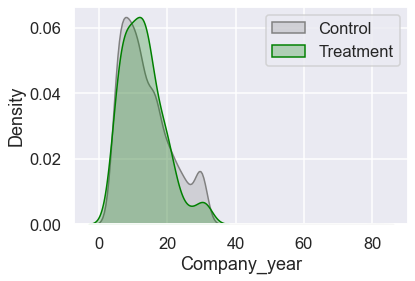

In [6]:
TREATMENT = 'Conflict'
OUTCOME = 'Returns'
df.groupby(TREATMENT)[OUTCOME].describe()
C_COLOUR = 'grey'
T_COLOUR = 'green'
C_LABEL = 'Control'
T_LABEL = 'Treatment'
sns.kdeplot(data=df[~df[TREATMENT]], x='Company_year', shade=True,
            color=C_COLOUR, label=C_LABEL)
sns.kdeplot(data=df[df[TREATMENT]], x='Company_year', shade=True,
            color=T_COLOUR, label=T_LABEL)
plt.legend();

Create bar plot

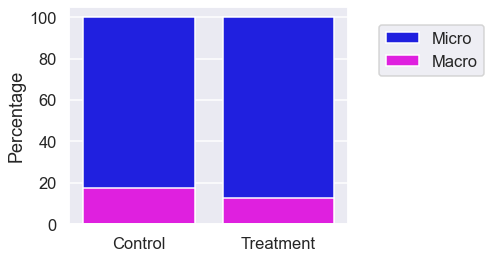

In [7]:
F_COLOUR = 'magenta'
M_COLOUR = 'blue'
F_LABEL = 'Macro'
M_LABEL = 'Micro'
gender = 100 * pd.crosstab(df[TREATMENT].replace({True: T_LABEL,
                                                  False: C_LABEL}),
                           df['Size_company'].replace({True: 'Macro',
                                                    False: 'Micro'}),
                           normalize='index')
gender['All'] = 100
plt.figure(figsize=(5, 4))
sns.barplot(data=gender, x=gender.index.astype(str),  y="All",
            color=M_COLOUR, label=M_LABEL)
sns.barplot(data=gender, x=gender.index.astype(str),  y='Micro',
            color=F_COLOUR, label=F_LABEL)
plt.legend(loc='center', bbox_to_anchor=(1.3, 0.8))
plt.xlabel('')
plt.ylabel('Percentage');

Build model

In [8]:
# Build a descriptive model
t = df[TREATMENT]
X = pd.get_dummies(df.drop(columns=[OUTCOME, TREATMENT]))
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('logistic_classifier', LogisticRegression())
])
pipe.fit(X, t)
# Predict
threshold = 0.5
df['proba'] = pipe.predict_proba(X)[:,1]
df['logit'] = df['proba'].apply(lambda p: np.log(p/(1-p)))
df['pred'] = np.where(df['proba']>=threshold, 1, 0)
df[TREATMENT]

0       False
1       False
2       False
3       False
4       False
        ...  
2595    False
2596    False
2597    False
2598    False
2599    False
Name: Conflict, Length: 2600, dtype: bool

In [12]:
df['logit']

0      -3.01
1      -2.93
2      -2.77
3      -2.71
4      -2.92
        ... 
2595   -2.67
2596   -2.81
2597   -2.73
2598   -2.90
2599   -1.56
Name: logit, Length: 2600, dtype: float64

In [9]:
print(f"Accuracy: {np.mean(df[TREATMENT]==df['pred']):.4f},\
 ROC AUC: {roc_auc_score(df[TREATMENT], df['proba']):.4f},\
 F1-score: {f1_score(df[TREATMENT], df['pred']):.4f}")
# Visualise confusion matrix
pd.crosstab(df[TREATMENT], df['pred']).rename(columns={0: False,
                                                       1:True})

Accuracy: 0.9477, ROC AUC: 0.5621, F1-score: 0.0000


pred,False
Conflict,
False,2464
True,136


In [8]:
df['pred']

0       1
1       1
2       1
3       1
4       1
       ..
2595    1
2596    1
2597    1
2598    1
2599    1
Name: pred, Length: 2600, dtype: int32

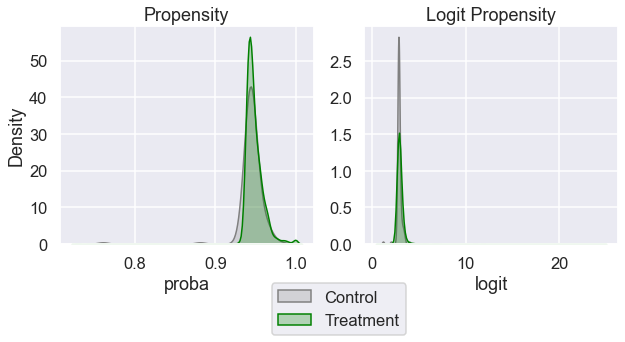

In [9]:
fig, ax = plt.subplots(1,2, figsize=(10,4))
# Visualise propensity
sns.kdeplot(data=df[~df[TREATMENT]], x='proba', shade=True,
            color=C_COLOUR, label=C_LABEL, ax=ax[0])
sns.kdeplot(data=df[df[TREATMENT]], x='proba', shade=True,
            color=T_COLOUR, label=T_LABEL, ax=ax[0])
ax[0].set_title('Propensity')
ax[0].legend(loc='center', bbox_to_anchor=(1.1, -0.3))
# Visualise logit propensity
sns.kdeplot(data=df[~df[TREATMENT]], x='logit', shade=True,
            color=C_COLOUR, label=C_LABEL, ax=ax[1])
sns.kdeplot(data=df[df[TREATMENT]], x='logit', shade=True,
            color=T_COLOUR, label=T_LABEL, ax=ax[1])
ax[1].set_title('Logit Propensity')
ax[1].set_ylabel("");

In [10]:
df.sort_values('logit', inplace=True)
n = len(df)-1

In [11]:
i=1000
ind=1000
row = 1000
n=2000
if i>0:
    below = df.iloc[:i-1]
    control_below = below[~below[TREATMENT]]
    match_below = control_below.iloc[-1]
    distance_below = match_below['logit'] - row['logit']
    if i==n:
                df.loc[ind, 'match'] = match_below.name
                df.loc[ind, 'distance'] = distance_below

            # Only overwrite if match_below is closer than match_above
    elif distance_below < distance_above:
                df.loc[ind, 'match'] = match_below.name
                df.loc[ind, 'distance'] = distance_below


TypeError: 'int' object is not subscriptable

In [100]:
control_below.iloc[-1]

IndexError: single positional indexer is out-of-bounds

for i, (ind, row) in enumerate(df.iterrows()):
    # Match the most similar untreated record to each treated record
    if row[TREATMENT]:
        # Find the closest untreated match among records sorted
        # higher. 'equal_or_above would' be more accurate but
        # used 'above' for brevity
        if i<n:
            above = df.iloc[i:]
            control_above = above[~above[TREATMENT]]
            match_above = control_above.iloc[0]
            distance_above = match_above['logit'] - row['logit']
            df.loc[ind, 'match'] = match_above.name
            df.loc[ind, 'distance'] = distance_above

        # Find the closest untreated match among records sorted
        # lower. 'equal_or_below' would be more accurate but
        # used 'below' for brevity
        if i>0:
            below = df.iloc[:i-1]
            control_below = below[~below[TREATMENT]]
            match_below = control_below.iloc[-1]
            distance_below = match_below['logit']
            if i==n:
                df.loc[ind, 'match'] = match_below.name
                df.loc[ind, 'distance'] = distance_below

            # Only overwrite if match_below is closer than match_above
            elif distance_below<distance_above:
                df.loc[ind, 'match'] = match_below.name
                df.loc[ind, 'distance'] = distance_below
df[df[TREATMENT]]

In [102]:
indices = df[df['match'].notna()].index.append(pd.Index(df.loc[df['match'].notna(), 'match']))
matched_df = df.loc[indices].reset_index(drop=True)
matched_df

,Company_year,Conflict,Size_company,T,Capital,Clr,Returns,Ndter,Total_debt,proba,logit,pred,match,distance
0,5.00,True,True,False,10000,0.79,0.12,-678.20,8592000.00,0.73,0.99,1,604.00,0.16
1,5.00,True,True,True,10000,0.70,0.36,-446.00,6330000.00,0.82,1.52,1,637.00,0.48
2,18.50,False,True,False,15000,1.00,0.33,-682.00,13265000.00,0.76,1.16,1,NaN,NaN
3,13.50,False,False,True,11000,0.99,0.00,-420.36,43515000.00,0.88,2.00,1,NaN,NaN


In [ ]:
COLUMNS = ['age', 'is_female', OUTCOME]
matches = pd.merge(df.loc[df[TREATMENT], COLUMNS+['match']],
                   df[COLUMNS], left_on='match',
                   right_index=True,
                   how='left', suffixes=('_t', '_c'))
matches

In [ ]:
for var in ['logit', 'age']:
    print(f"{var} | Before matching")
    display(df.groupby(TREATMENT)[var].describe())
    print(f"{var} | After matching")
    display(matched_df.groupby(TREATMENT)[var].describe())

In [ ]:
for var in ['logit', 'age']:
    fig, ax = plt.subplots(1,2,figsize=(10,4))
    # Visualise original distribution
    sns.kdeplot(data=df[~df[TREATMENT]], x=var, shade=True,
                color=C_COLOUR, label=C_LABEL, ax=ax[0])
    sns.kdeplot(data=df[df[TREATMENT]], x=var, shade=True,
                color=T_COLOUR, label=T_LABEL, ax=ax[0])
    ax[0].set_title('Before matching')

    # Visualise new distribution
    sns.kdeplot(data=matched_df[~matched_df[TREATMENT]], x=var,
                shade=True, color=C_COLOUR, label=C_LABEL, ax=ax[1])
    sns.kdeplot(data=matched_df[matched_df[TREATMENT]], x=var,
                shade=True, color=T_COLOUR, label=T_LABEL, ax=ax[1])
    ax[1].set_title('After matching')
    ax[1].set_ylabel("")
    plt.tight_layout()
ax[0].legend(loc='center', bbox_to_anchor=(1.1, -0.3));

In [ ]:
print(f"{'is_female'} | Before matching")
display(pd.crosstab(df[TREATMENT], df['is_female'],
                    normalize='index'))
print(f"{'is_female'} | After matching")
display(pd.crosstab(matched_df[TREATMENT], matched_df['is_female'],
                    normalize='index'))

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
# Visualise original distribution
sns.barplot(data=gender, x=gender.index.astype(str), y="All",
            color=M_COLOUR, label=M_LABEL, ax=ax[0])
sns.barplot(data=gender, x=gender.index.astype(str), y='Female',
            color=F_COLOUR, label=F_LABEL, ax=ax[0])
ax[0].legend(loc='center', bbox_to_anchor=(1.1, -0.3))
ax[0].set_xlabel('')
ax[0].set_ylabel('Percentage')
ax[0].set_title('Before matching')
# Visualise new distribution
gender_after = 100 * pd.crosstab(
    matched_df[TREATMENT].replace({True: T_LABEL, False: C_LABEL}),
    matched_df['is_female'].replace({True: 'Female', False: 'Male'}),
    normalize='index'
)
gender_after['All'] = 100
sns.barplot(data=gender_after, x=gender_after.index.astype(str),
            y="All", color=M_COLOUR, label=M_LABEL, ax=ax[1])
sns.barplot(data=gender_after, x=gender_after.index.astype(str),
            y='Female', color=F_COLOUR, label=F_LABEL, ax=ax[1])
ax[1].set_xlabel('')
ax[1].set_title('After matching')
ax[1].set_ylabel('');